## Fashion-mnist 살펴보기
* 각 레이블에 해당하는 의류 품목 살펴보기

In [1]:
from keras.datasets.fashion_mnist import load_data

In [2]:
# fashion-mnist 다운받기
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


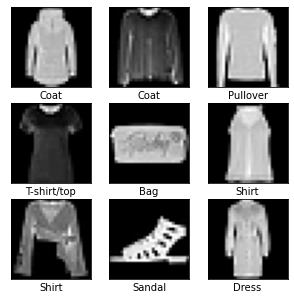

In [3]:
# fashion-mnist 항목 확인하기
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 이제 확률값으로 나오는 것을 확인함
# 위치 값을 찾아서 구별해냄
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1) # 3행 3열에 i값을 넣는데 0부터 시작하므로 1을 더해줌
  plt.xticks([]) # x축 눈금관련 정보. 빈 리스트를 넣어서 지워준다.
  plt.yticks([]) # y축
  plt.imshow(x_train[idx], cmap='gray') # index를 학습, cmap을 grayscale로 해줌
  plt.xlabel(class_names[y_train[idx]]) # 레이블을 가져옴
plt.show()

In [4]:
x_train.min(), x_train.max()

(0, 255)

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [7]:
y_train.min(),y_train.max()

(0, 9)

In [8]:
from keras.utils import to_categorical

In [9]:
# 데이터 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.min(),y_train.max()

(0.0, 1.0)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
# 검증용 데이터셋 만들기
from sklearn.model_selection import train_test_split

In [13]:
# 학습/데이터 비율은 7:3으로 설정
x_train, x_val,y_train,y_val = train_test_split(x_train,y_train,
                                                        test_size=0.3,random_state=777)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

* Flatten : 배치 크기를 제외하고 데이터를 1차원 배열의 형태로 변환해줌
   ex) (128, 6, 2, 2) 입력 -> (128, 24)

In [15]:
first_model = Sequential()
# 입력 데이터의 형태 명시
first_model.add(Flatten(input_shape=(28,28))) # (28, 28) -> (28 * 28)
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [16]:
first_model.compile(optimizer='adam', # 옵티마이저 : adam
                          loss='categorical_crossentropy', # 손실함수 : categorical_crossentropy
                          metrics=['acc']) # 평가지표 : acc

In [17]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
first_history = first_model.fit(x_train, y_train, 
                                    epochs=30, batch_size=128, 
                                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 5s 12ms/step - loss: 0.6675 - acc: 0.7718 - val_loss: 0.4710 - val_acc: 0.8411
Epoch 2/30
329/329 [==============================] - 3s 10ms/step - loss: 0.4476 - acc: 0.8412 - val_loss: 0.4334 - val_acc: 0.8452
Epoch 3/30
329/329 [==============================] - 4s 11ms/step - loss: 0.4094 - acc: 0.8545 - val_loss: 0.4176 - val_acc: 0.8523
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3823 - acc: 0.8638 - val_loss: 0.3829 - val_acc: 0.8643
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3636 - acc: 0.8698 - val_loss: 0.3824 - val_acc: 0.8638
Epoch 6/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3494 - acc: 0.8739 - val_loss: 0.4131 - val_acc: 0.8624
Epoch 7/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3338 - acc: 0.8787 - val_loss: 0.3614 - val_acc: 0.8739
Epoch 8/30
329/329 [==============================] - 5s 14ms/step - lo

In [19]:
second_model = Sequential()

second_model.add(Flatten(input_shape=(28,28))) 
second_model.add(Dense(128, activation = 'relu')) # Dense층 추가가
second_model.add(Dense(64, activation = 'relu')) 
second_model.add(Dense(32, activation = 'relu')) 
second_model.add(Dense(10, activation = 'softmax')) 

second_model.compile(optimizer='adam', 
                          loss='categorical_crossentropy', 
                          metrics=['acc']) 

second_history = second_model.fit(x_train, y_train, 
                                    epochs=30, batch_size=128, 
                                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6283 - acc: 0.7854 - val_loss: 0.4367 - val_acc: 0.8508
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4201 - acc: 0.8505 - val_loss: 0.4171 - val_acc: 0.8543
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3761 - acc: 0.8644 - val_loss: 0.3660 - val_acc: 0.8706
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3495 - acc: 0.8713 - val_loss: 0.3704 - val_acc: 0.8668
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3282 - acc: 0.8811 - val_loss: 0.3398 - val_acc: 0.8791
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3113 - acc: 0.8866 - val_loss: 0.3544 - val_acc: 0.8724
Epoch 7/30
329/329 [==============================] - 3s 8ms/step - loss: 0.2917 - acc: 0.8917 - val_loss: 0.3348 - val_acc: 0.8788
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 0.

In [20]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


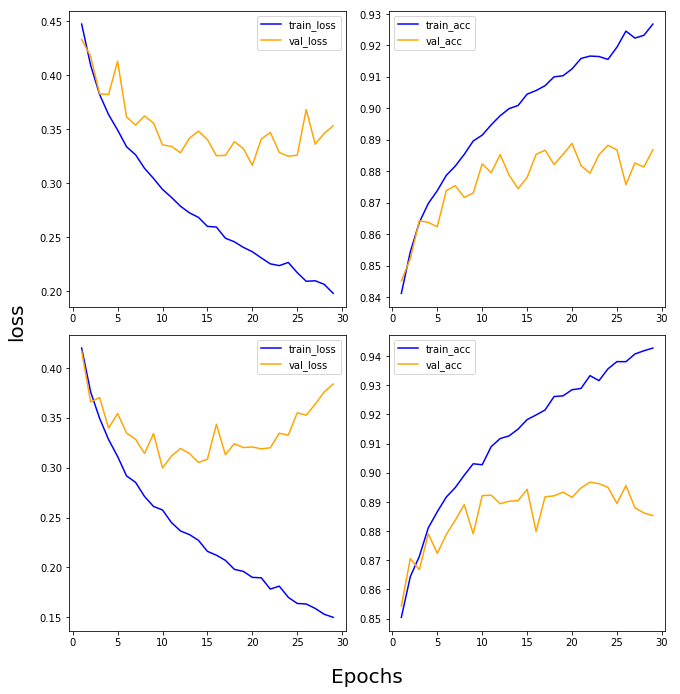

In [21]:
# 두 모델의 학습 과정 그려보기
def draw_loss_acc(history1, history2, epochs):
  his_dict_1 = history1.history
  his_dict_2 = history2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1,1,1)
  # axis선과 ax의 축 레이블 제거
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w',top=False,bottom=False,left=False,right=False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2, 2, i+1)
    temp = keys[i%2] # i에 0, 1, 2, 3 순서로 들어감
    val_temp = keys[(i+2)%2 + 2] # 2, 3, 4, 5 순서로 들어감 -> 0, 1, 0, 1 -> 2, 3, 2, 3
    temp_history = his_dict_1 if i < 2 else his_dict_2 
    temp_ax.plot(epochs,temp_history[temp][1:],color='blue',label='train_'+temp)
    temp_ax.plot(epochs,temp_history[val_temp][1:],color='orange',label=val_temp)
    if(i==1 or i==3):  # i가 홀수값일 때
      start,end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start,2),end,0.01))
    temp_ax.legend()
  ax.set_ylabel('loss',size=20,labelpad=20)
  ax.set_xlabel('Epochs',size=20,labelpad=20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
from PIL import Image
import numpy as np

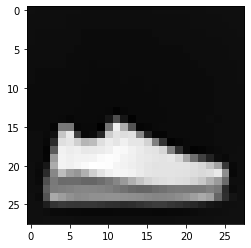

In [26]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/04_fashion_mnist_img/img02.jpg')
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)
img = (255-img)/255
plt.imshow(img, cmap='gray')
plt.show()

In [28]:
img.shape,x_train.shape

((28, 28), (42000, 28, 28))

In [29]:
result = first_model.predict(img.reshape(-1,28,28))

1/1 [==============================] - 0s 154ms/step


In [31]:
result.shape

(1, 10)

In [34]:
np.argmax(np.round(result,2))

8

In [35]:
class_names[np.argmax(np.round(result,2))]

'Bag'

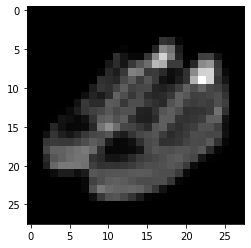

In [36]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/04_fashion_mnist_img/img03.jpg')
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)
img = (255-img)/255
plt.imshow(img, cmap='gray')
plt.show()

In [37]:
result = first_model.predict(img.reshape(-1,28,28))
np.argmax(np.round(result,2))
class_names[np.argmax(np.round(result,2))]

1/1 [==============================] - 0s 17ms/step


'Sandal'

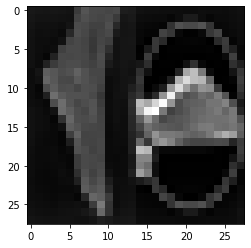

In [38]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/04_fashion_mnist_img/img04.jpg')
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)
img = (255-img)/255
plt.imshow(img, cmap='gray')
plt.show()

In [39]:
result = first_model.predict(img.reshape(-1,28,28))
np.argmax(np.round(result,2))
class_names[np.argmax(np.round(result,2))]

1/1 [==============================] - 0s 45ms/step


'Shirt'